#$\textbf{Image Processing}$
Image processing refers to the manipulation and analysis of digital images using algorithms and techniques. It involves enhancing image quality, restoring degraded images, segmenting images into meaningful parts, and extracting features for analysis. This field finds applications in various areas, including medical imaging, computer vision, and photography, enabling tasks such as object detection, image recognition, and data compression.



$\textbf{How Machines “See” Images?}$

![](https://assets-global.website-files.com/5d7b77b063a9066d83e1209c/62fe3b70ba56f112d54f4cbe_IN%20TEXT%20ASSET-16.webp)
Reference: https://www.v7labs.com/blog/image-processing-guide#types-of-images-how-machines-see-images

$\textbf{Importing the important libraries.}$

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torchvision.utils import make_grid
import numpy as np
import matplotlib.pyplot as plt

# $\textbf{MNIST Dataset}$


The MNIST (Modified National Institute of Standards and Technology) dataset is a large database of handwritten digits commonly used for training various image processing systems. Here are some key points about the MNIST dataset:

* The dataset consists of 70,000 images of handwritten digits.
Each image is a 28x28 pixel grayscale image.
*There are 60,000 images in the training set and 10,000 images in the test set.
Each image is associated with a label from 0 to 9, corresponding to the digit it represents.

Each class (digit 0-9) has approximately the following number of images:

* Training set: About 6,000 images per class \\
* Test set: About 1,000 images per class


The MNIST dataset is widely used for training and testing in the field of machine learning and computer vision.
It is often used as a benchmark dataset for evaluating algorithms.

$\textbf{MNIST Example Images:}$

![](https://www.researchgate.net/profile/Steven-Young-5/publication/306056875/figure/fig1/AS:393921575309346@1470929630835/Example-images-from-the-MNIST-dataset.png)

Reference: https://www.researchgate.net/figure/Example-images-from-the-MNIST-dataset_fig1_306056875

#$\textbf{Loading the dataset}$

In [26]:
# Define your custom transforms
custom_transforms = transforms.Compose([transforms.ToTensor()])
print(custom_transforms)

#Loading MNIST train and test datasets
print("-" * 10, "Train Dataset", "-" * 10)
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=custom_transforms)
print(mnist_trainset)

print("\n", "-" * 10, "Test Dataset", "-" * 10)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=custom_transforms)
print(mnist_testset)

Compose(
    ToTensor()
)
---------- Train Dataset ----------
Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

 ---------- Test Dataset ----------
Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )


$\textbf{About torchvision.transforms :}$

Transforms are common image transformations available in the [torchvision.transforms](https://pytorch.org/vision/stable/transforms.html) module.

It has different kind of transformations as:


1.   Geometry
2.   Color
3.   Composition


These are some examples of transforms:
*   transforms.ToTensor() :: Converts the images to PyTorch tensors. This transformation is essential as PyTorch models work with tensors.
*   transforms.Resize() :: This transformation resizes the images to a new size.
*   transforms.ElasticTransform() :: Used to apply elastic distortions to images.
*   transforms.RandomAffine() :: Used to apply  translations, rotations, scaling, and shearing transformations to images.
*   transforms.compose() :: It's used to chain together multiple image transformations into a single pipeline. The transformations are applied in the order they are listed.

While loading MNIST dataset here, we have used only one transform which is transforms.ToTensor()


$\textbf{About torchvision.datasets :}$

Torchvision provides many built-in datasets in the [torchvision.datasets](https://pytorch.org/vision/main/datasets.html) module, as well as utility classes for building your own datasets.

It contains datasets for dfferent type of tasks as:

1.   Image classification
2.   Image detection or segmentation
3.   Image captioning and etc.

Here, we are acquiring the data by employing:

*   datasets.mnist: This part creates an instance of the mnist dataset class, representing the mnist dataset for training.
*   root='./data': Specifies the directory where the dataset will be downloaded and stored.
*   train=True: Indicates that this is the training subset of the mnist dataset.
*   download=True: Specifies that if the dataset is not already present in the specified directory, it should be downloaded from the internet.

$\textbf{Checking the length of trainset and testset}$

In [27]:
print("Number of images in training set:", len(mnist_trainset))
print("Number of images in testing set:", len(mnist_testset))

Number of images in training set: 60000
Number of images in testing set: 10000


$\textbf{One sample from mnist dataset}$

In [28]:
type(mnist_trainset[0])

tuple

In [29]:
len(mnist_trainset[0])          #Tuple = (image,label)

2

In [30]:
mnist_trainset[0]               #Tuple = (image,label)

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

$\textbf{Printing information about the first few samples in the dataset}$


In [7]:
for i in range(2):
    image, label = mnist_trainset[i]
    print(f"Sample {i + 1} - Label: {label}")
    print("Image Tensor Shape:", image.shape)
    print("Image Tensor Values:\n", image[:, :, :])
    print("-" * 120)
    print()

Sample 1 - Label: 5
Image Tensor Shape: torch.Size([1, 28, 28])
Image Tensor Values:
 tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0

$\textbf{Classes}$

In [8]:
classes = mnist_trainset.classes
print('Number of Classes:', len(classes))
print('Class Names :\n', classes)

Number of Classes: 10
Class Names :
 ['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']


$\textbf{Visualizing images}$

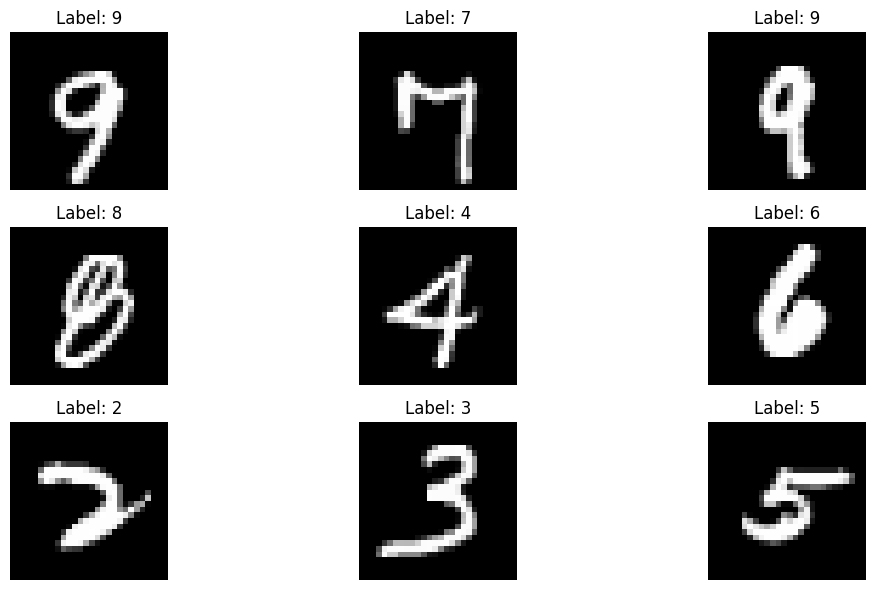

In [9]:
import random
# Get 9 random indices
indices = random.sample(range(len(mnist_trainset)), 9)

# Create a subplot
fig, axes = plt.subplots(3, 3, figsize=(12, 6))

# Display the images
for i, ax in enumerate(axes.flat):
    image, label = mnist_trainset[indices[i]]
    image = image.squeeze()  # Remove the channel dimension

    ax.imshow(image, cmap='gray')
    ax.set_title(f'Label: {label}')
    ax.axis('off')

plt.tight_layout()
plt.show()

$\textbf{Visualizing 10 images from each class}$


---------- 0 - zero ------------------------------------------------------------


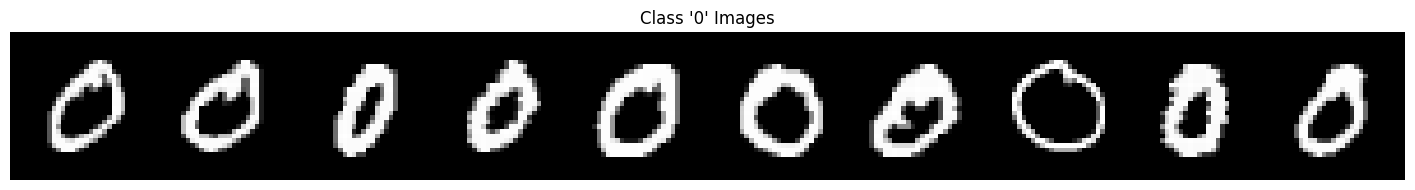

---------- 1 - one ------------------------------------------------------------


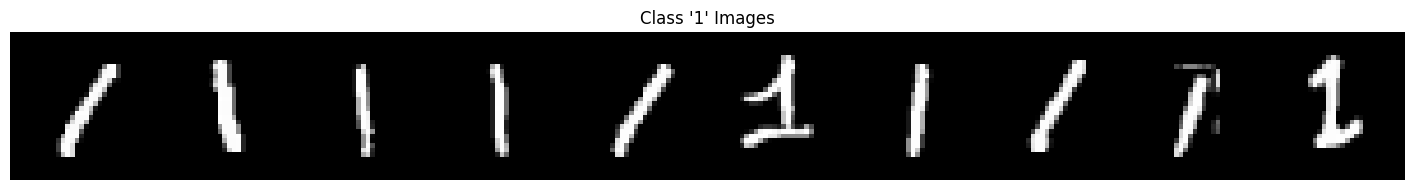

---------- 2 - two ------------------------------------------------------------


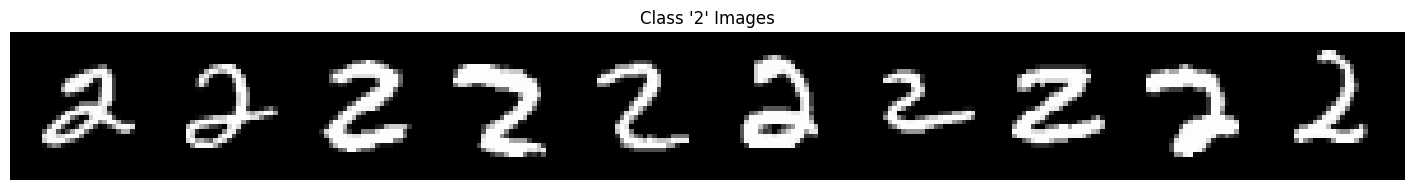

---------- 3 - three ------------------------------------------------------------


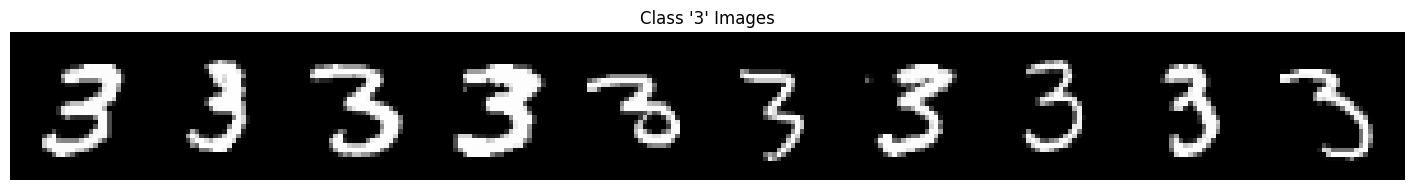

---------- 4 - four ------------------------------------------------------------


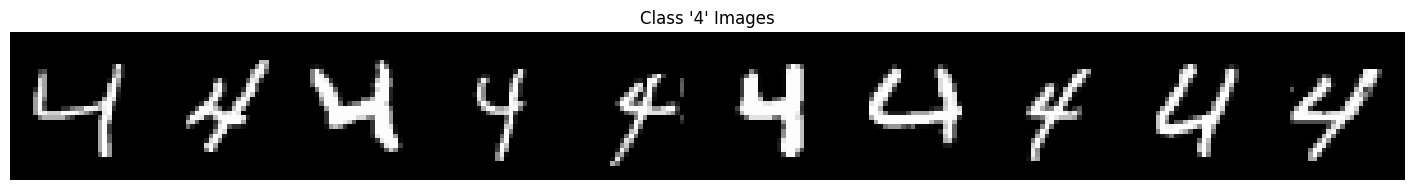

---------- 5 - five ------------------------------------------------------------


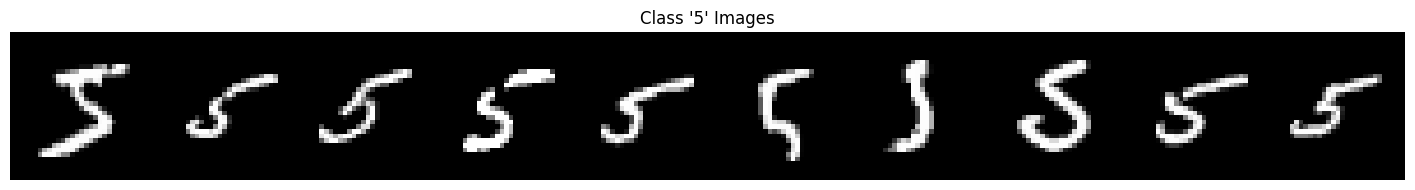

---------- 6 - six ------------------------------------------------------------


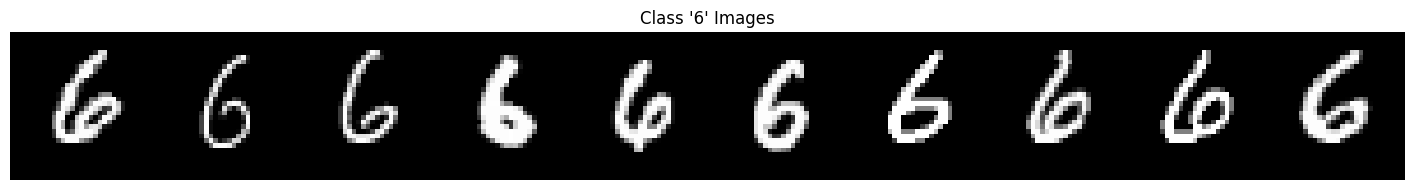

---------- 7 - seven ------------------------------------------------------------


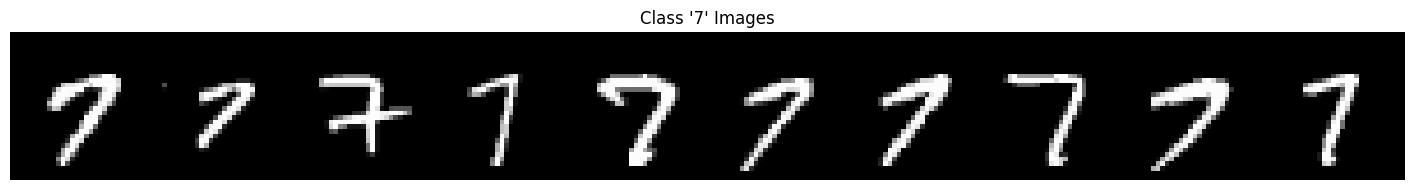

---------- 8 - eight ------------------------------------------------------------


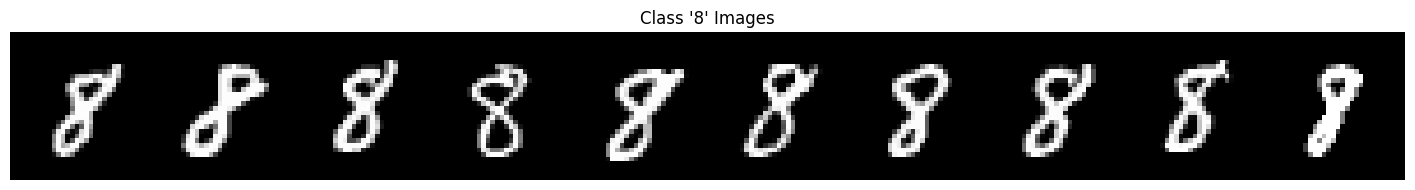

---------- 9 - nine ------------------------------------------------------------


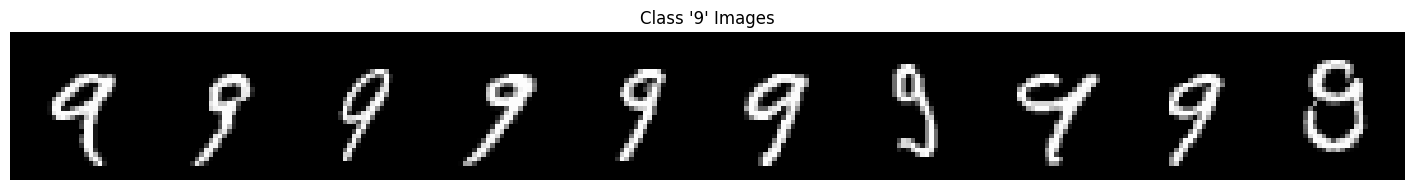

In [10]:
for class_idx, class_label in enumerate(classes):
    print("-"*10, class_label, "-"*60)

    class_images = []
    for j, (img, label) in enumerate(mnist_trainset):
        if label == class_idx:
            class_images.append(img)
        if len(class_images) == 10:
            break
    class_images = torch.tensor(np.array(class_images))

    plt.figure(figsize=(18,5))
    plt.imshow(make_grid(class_images, nrow=10).permute(1,2,0).numpy())
    plt.title(f"Class '{class_idx}' Images")
    plt.axis(False)
    plt.show()

# $\textbf{Creating DataLoader}$

$\textbf{torch.utils.data.DataLoader}$

A [Torch DataLoader](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) is a utility in the PyTorch library designed to facilitate the handling of datasets during training and inference processes. It achieves this by creating an iterable dataset object that can be efficiently processed in batches. This allows for improved memory usage and faster computation. The DataLoader can be employed with various data sources, such as NumPy arrays, PyTorch tensors, or custom data formats like CSV files or image directories. This class simplifies the process of loading, batching, and managing data for machine learning tasks, enhancing the overall efficiency and convenience of working with datasets in PyTorch.








In [11]:
train_dataloader = torch.utils.data.DataLoader(dataset=mnist_trainset, batch_size=64, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(dataset=mnist_testset, batch_size=64, shuffle=False)

$\textbf{Number of batches formed}$

In [12]:
print("Number of batches in Train Dataloader:", len(train_dataloader))
print("Number of batches in Test Dataloader:", len(test_dataloader))

Number of batches in Train Dataloader: 938
Number of batches in Test Dataloader: 157


$\textbf{Shape of one batch}$

In [13]:
images, labels = next(iter(train_dataloader))
images.shape, labels.shape

(torch.Size([64, 1, 28, 28]), torch.Size([64]))

$\textbf{Let's visualize one batch from the dataloader}$
:  

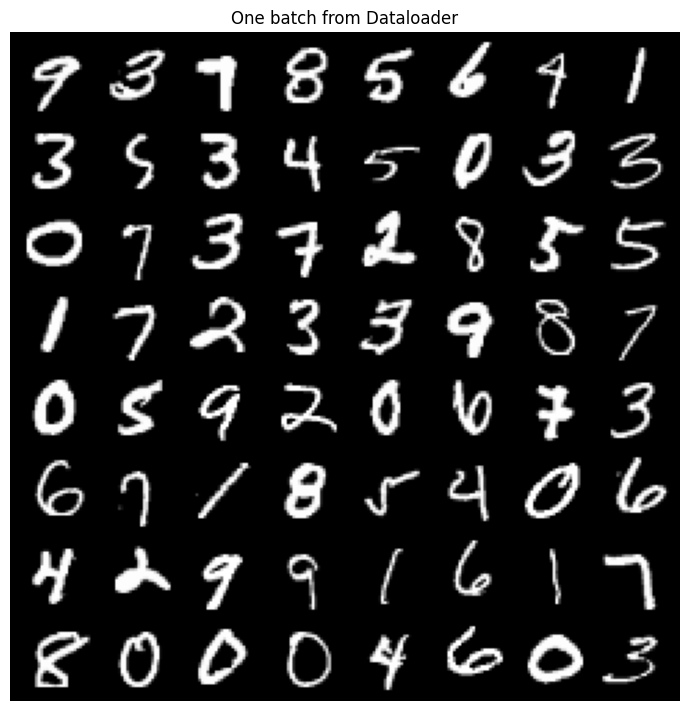

In [14]:
from torchvision.utils import make_grid

plt.figure(figsize=(19,10))

plt.subplot(1,2,1)
plt.title("One batch from Dataloader")
plt.imshow(make_grid(images, nrow=8).permute(1,2,0).numpy(), cmap='gray')
plt.axis(False)

plt.show()

In [15]:
labels

tensor([9, 3, 7, 8, 5, 6, 4, 1, 3, 5, 3, 4, 5, 0, 3, 3, 0, 7, 3, 7, 2, 8, 5, 5,
        1, 7, 2, 3, 3, 9, 8, 7, 0, 5, 9, 2, 0, 6, 7, 3, 6, 7, 1, 8, 5, 4, 0, 6,
        4, 2, 9, 9, 1, 6, 1, 7, 8, 0, 0, 0, 4, 6, 0, 3])

#$\textbf{Loading data from
 Google Drive}$



In [ ]:
 1F7ReDzjzyOPhZOmHVvScsd8KsscZlPIf

In [31]:
import gdown
import pandas as pd

# Replace these IDs with the actual file IDs from your Google Drive links
train_file_id = '1F7ReDzjzyOPhZOmHVvScsd8KsscZlPIf'
test_file_id = '1zJHupUHoheZTk44ax8OtqgEQo03fkrWW'

train_url = f'https://drive.google.com/uc?id={train_file_id}'
test_url = f'https://drive.google.com/uc?id={test_file_id}'

gdown.download(train_url, 'mnist_train.csv', quiet=False)
gdown.download(test_url, 'mnist_test.csv', quiet=False)

# Step 4: Load the CSV files
train_df = pd.read_csv('mnist_train.csv')
test_df = pd.read_csv('mnist_test.csv')

Downloading...
From (original): https://drive.google.com/uc?id=1F7ReDzjzyOPhZOmHVvScsd8KsscZlPIf
From (redirected): https://drive.google.com/uc?id=1F7ReDzjzyOPhZOmHVvScsd8KsscZlPIf&confirm=t&uuid=946db1c4-a253-493c-90d7-250e15109930
To: /content/mnist_train.csv
100%|██████████| 110M/110M [00:00<00:00, 189MB/s]
Downloading...
From: https://drive.google.com/uc?id=1zJHupUHoheZTk44ax8OtqgEQo03fkrWW
To: /content/mnist_test.csv
100%|██████████| 18.3M/18.3M [00:00<00:00, 51.3MB/s]


In [32]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


$\textbf{Converting into required form}$

In [33]:
# Step 5: Convert DataFrames back to MNIST format
# Extract labels
train_labels = train_df['label'].values
test_labels = test_df['label'].values

# Extract images
train_images = train_df.drop('label', axis=1).values
test_images = test_df.drop('label', axis=1).values

# Reshape the images back to 28x28 format
train_images = train_images.reshape(-1, 28, 28)
test_images = test_images.reshape(-1, 28, 28)

# Step 6: Verify the shapes
print(f'Train images shape: {train_images.shape}')
print(f'Train labels shape: {train_labels.shape}')
print(f'Test images shape: {test_images.shape}')
print(f'Test labels shape: {test_labels.shape}')

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


In [34]:
type(train_images)

numpy.ndarray

In [35]:
#Converting to tensors
train_images_tensor=torch.tensor(train_images,dtype=torch.float32).unsqueeze(dim=1)
train_labels_tensor=torch.tensor(train_labels,dtype=torch.float32)
test_images_tensor=torch.tensor(test_images,dtype=torch.float32).unsqueeze(dim=1)
test_labels_tensor=torch.tensor(test_labels,dtype=torch.float32)
train_images_tensor.shape,train_labels_tensor.shape,train_images_tensor.shape,train_labels_tensor.shape

(torch.Size([60000, 1, 28, 28]),
 torch.Size([60000]),
 torch.Size([60000, 1, 28, 28]),
 torch.Size([60000]))

$\textbf{Creating Dataloaders}$

In [ ]:
# Create TensorDatasets
from torch.utils.data import TensorDataset

train_dataset = TensorDataset(train_images_tensor, train_labels_tensor)
test_dataset = TensorDataset(test_images_tensor, test_labels_tensor)

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

In [ ]:
print("Number of batches in Train Dataloader:", len(train_dataloader))
print("Number of batches in Test Dataloader:", len(test_dataloader))

Number of batches in Train Dataloader: 938
Number of batches in Test Dataloader: 157


In [ ]:
im,lb=next(iter(train_dataloader))
im.shape,lb.shape

(torch.Size([64, 1, 28, 28]), torch.Size([64]))

# $\textbf{Visualizing Transforms}$

$\textbf{Resizing the image}$

torch.Size([1, 128, 128])


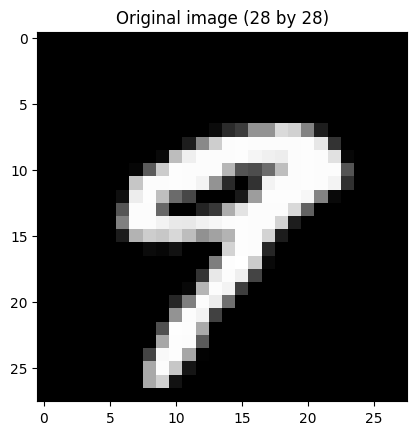

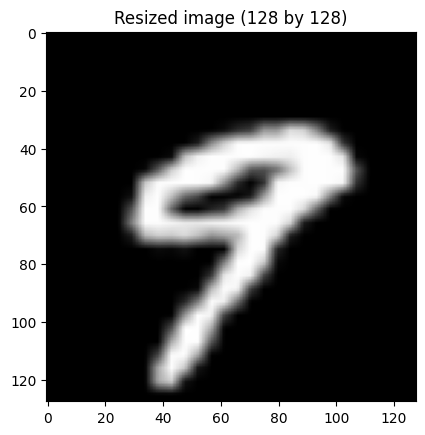

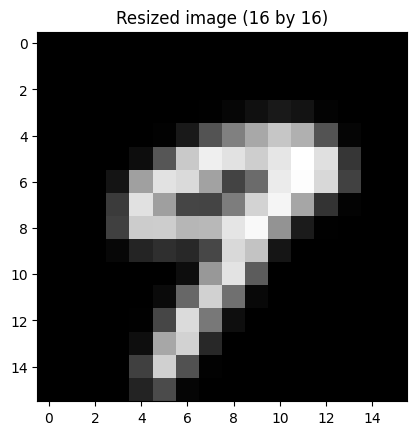

Label Name: 9 - nine


In [38]:
img = images[0]
l = labels[0]

Resize_128 = torchvision.transforms.Resize((128))
Resize_16 = torchvision.transforms.Resize((16))
img_128 = Resize_128(img)
img_16 = Resize_16(img)

print(img_128.shape)

plt.imshow(img.permute((1,2,0)),cmap='gray')
plt.title('Original image (28 by 28)')
plt.show()

plt.imshow(img_128.permute((1,2,0)),cmap='gray')
plt.title('Resized image (128 by 128)')
plt.show()

plt.imshow(img_16.permute((1,2,0)),cmap='gray')
plt.title('Resized image (16 by 16)')
plt.show()
print('Label Name:', classes[l])

$\textbf{About torchvision.transforms.Resize :}$

**torchvision.transforms.Resize** is a transformation provided by the torchvision library, which is part of the PyTorch ecosystem. This transformation is used to resize images to a specified size. It's often used in data preprocessing pipelines for image data to ensure that all images have the same dimensions before being fed into a neural network

$\textbf{Elastic Transform}$

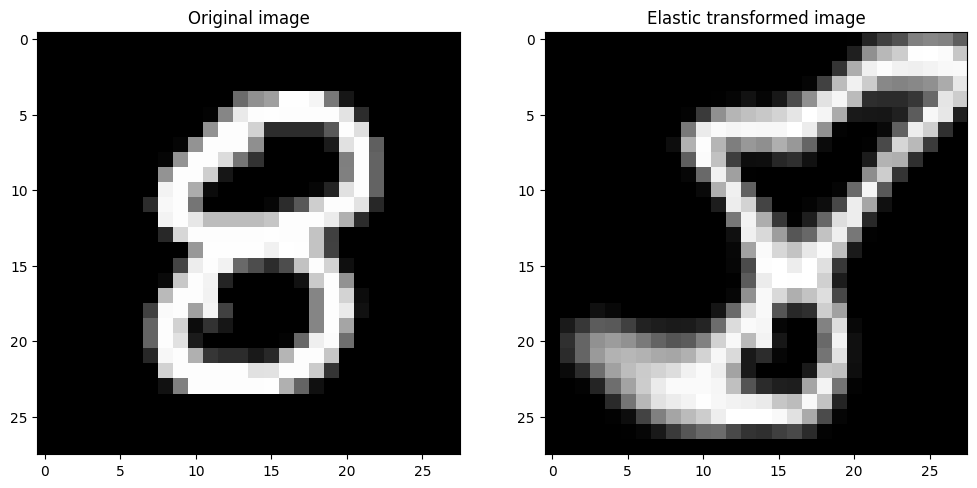

Label Name: 8 - eight


In [45]:
img = images[3]
l = labels[3]

elastic_transform = torchvision.transforms.ElasticTransform(alpha=100.0, sigma=4.0)
img_ET = elastic_transform(img)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Original image')
plt.imshow(img.permute((1,2,0)),cmap='gray')

plt.subplot(1,2,2)
plt.title('Elastic transformed image')
plt.imshow(img_ET.permute((1,2,0)),cmap='gray')
plt.show()
print('Label Name:', classes[l])

$\textbf{About torchvision.transforms.ElasticTransform :}$

**torchvision.transforms.ElasticTransform** is a transformation provided by the torchvision library in PyTorch, used to apply elastic distortions to images. This is particularly useful for data augmentation, as it helps to create variations of images that can improve the robustness and generalization of neural networks.

$\textbf{Random Affine Transform}$

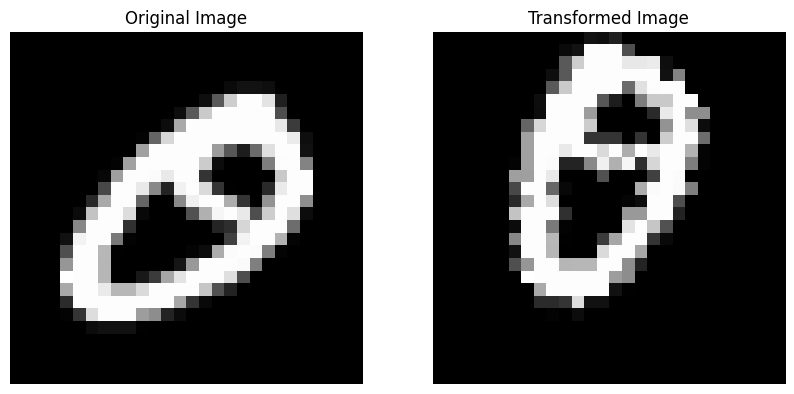

In [ ]:
image = images[39]

# Define the affine transformations
ra_transform = torchvision.transforms.RandomAffine(degrees=30, translate=(0.1, 0.1), scale=(0.8, 1.2), shear=10)

# Apply the transformation
transformed_image = ra_transform(image)

# Plot the original and transformed images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(image.squeeze(), cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(transformed_image.squeeze(), cmap='gray')
axes[1].set_title('Transformed Image')
axes[1].axis('off')

plt.show()

$\textbf{About torchvision.transforms.RandomAffine :}$

**torchvision.transforms.RandomAffine** is a transformation in the torchvision library that allows you to apply random affine transformations to images. Affine transformations include translations, rotations, scaling, and shearing. This transformation is useful for data augmentation as it helps to create variations of the original images, improving the generalization capability of neural networks.

$\textbf{Random Resize Crop}$

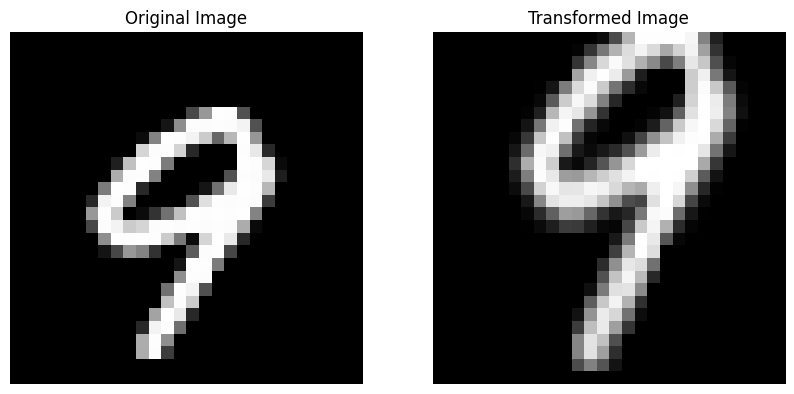

In [ ]:
image=images[58]
transform = torchvision.transforms.RandomResizedCrop(size= 28, scale=(0.4,0.8))

# Apply the transformation
transformed_image = transform(image)

# Plot the original and transformed images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(image.squeeze(), cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(transformed_image.squeeze(), cmap='gray')
axes[1].set_title('Transformed Image')
axes[1].axis('off')

plt.show()

$\textbf{About transforms.RandomResizedCrop:}$

**'transforms.RandomResizedCrop'** is a data augmentation technique used in deep learning to randomly crop and resize an image. Here’s how it works:

Random Crop: It randomly selects a portion of the image to crop. This helps the model become invariant to the position of objects within the image.

Resize: After cropping, the selected portion is resized to a specified size. This ensures that the cropped image matches the desired dimensions for training

# $\textbf{Some image processing operations}$

$\textbf{Making the grayscale image binary}$


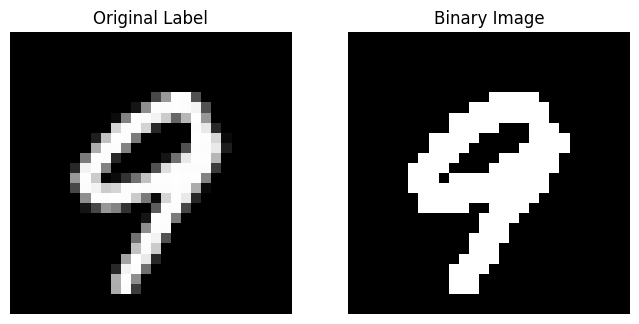

In [ ]:
img = images[1]
binary_image = (image > 0).float()

# Display the original image
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f'Original Label')
plt.axis('off')

# Display the binary image
plt.subplot(1, 2, 2)
plt.imshow(binary_image.squeeze(), cmap='gray')
plt.title(f'Binary Image')
plt.axis('off')

plt.show()

In [ ]:
img

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [ ]:
binary_image

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
          1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,

$\textbf{Inverting the colors of grayscale image}$

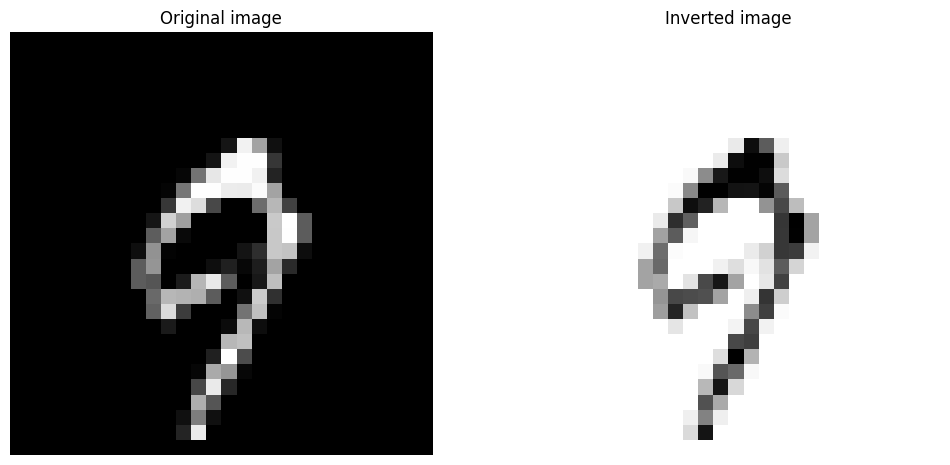

Label as Number: tensor(9)
Label as Name: 9 - nine


In [ ]:
# Select the 10th image and its label
img, l = images[11], labels[11]

# Invert the image
inverted_img = 1 - img

# Plot the images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original image')
plt.imshow(img.squeeze(), cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Inverted image')
plt.imshow(inverted_img.squeeze(), cmap='gray')
plt.axis('off')

plt.show()

print('Label as Number:', l)
print('Label as Name:', classes[l])

$\textbf{Normalization}$

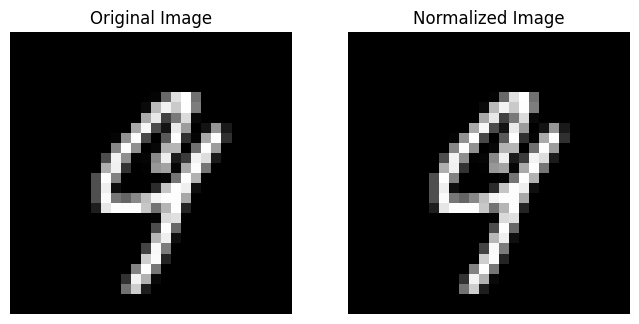

In [ ]:
img=images[15]

# Calculate mean and standard deviation of the image
mean = img.mean()
stddev = img.std()

# Normalize the image
normalized_image = (img - mean) / stddev

# Plotting the original and normalized images
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(img.squeeze(), cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(normalized_image.squeeze(), cmap='gray')
plt.title('Normalized Image')
plt.axis('off')

plt.show()

In [ ]:
img

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [ ]:
normalized_image

tensor([[[-0.3672, -0.3672, -0.3672, -0.3672, -0.3672, -0.3672, -0.3672,
          -0.3672, -0.3672, -0.3672, -0.3672, -0.3672, -0.3672, -0.3672,
          -0.3672, -0.3672, -0.3672, -0.3672, -0.3672, -0.3672, -0.3672,
          -0.3672, -0.3672, -0.3672, -0.3672, -0.3672, -0.3672, -0.3672],
         [-0.3672, -0.3672, -0.3672, -0.3672, -0.3672, -0.3672, -0.3672,
          -0.3672, -0.3672, -0.3672, -0.3672, -0.3672, -0.3672, -0.3672,
          -0.3672, -0.3672, -0.3672, -0.3672, -0.3672, -0.3672, -0.3672,
          -0.3672, -0.3672, -0.3672, -0.3672, -0.3672, -0.3672, -0.3672],
         [-0.3672, -0.3672, -0.3672, -0.3672, -0.3672, -0.3672, -0.3672,
          -0.3672, -0.3672, -0.3672, -0.3672, -0.3672, -0.3672, -0.3672,
          -0.3672, -0.3672, -0.3672, -0.3672, -0.3672, -0.3672, -0.3672,
          -0.3672, -0.3672, -0.3672, -0.3672, -0.3672, -0.3672, -0.3672],
         [-0.3672, -0.3672, -0.3672, -0.3672, -0.3672, -0.3672, -0.3672,
          -0.3672, -0.3672, -0.3672, -0.3672, -0

# $\textbf{Data Augmentation}$

Data augmentation is a technique used to increase the size and variations in a dataset by making various modifications to the existing data. Instead of collecting more data, you apply transformations like rotating, flipping, zooming, or adjusting brightness to the original data. This helps create new, varied examples from the original data, which can improve the performance and robustness of machine learning models by exposing them to a wider range of scenarios and conditions during training.

$\textbf{Creating Augmented Train Dataset}$

In [ ]:
# Define the original and augmentation transformations
original_transform = transforms.Compose([transforms.ToTensor()])

augmentation_transform = transforms.Compose([
    transforms.RandomAffine(degrees=10, translate=(0.1, 0.1), shear=10, scale=(0.8, 1.2)),
    transforms.RandomResizedCrop(size= 28, scale=(0.8, 1.2)),
    transforms.ElasticTransform(alpha=34.0, sigma=4.0),
    transforms.ToTensor()
])

# Load the original MNIST dataset without augmentation
original_train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=original_transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=original_transform)

# Load the augmented MNIST dataset by applying augmentation transform while loading.
augmented_train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=augmentation_transform)

$\textbf{Visualizing Augmented Train Dataset}$

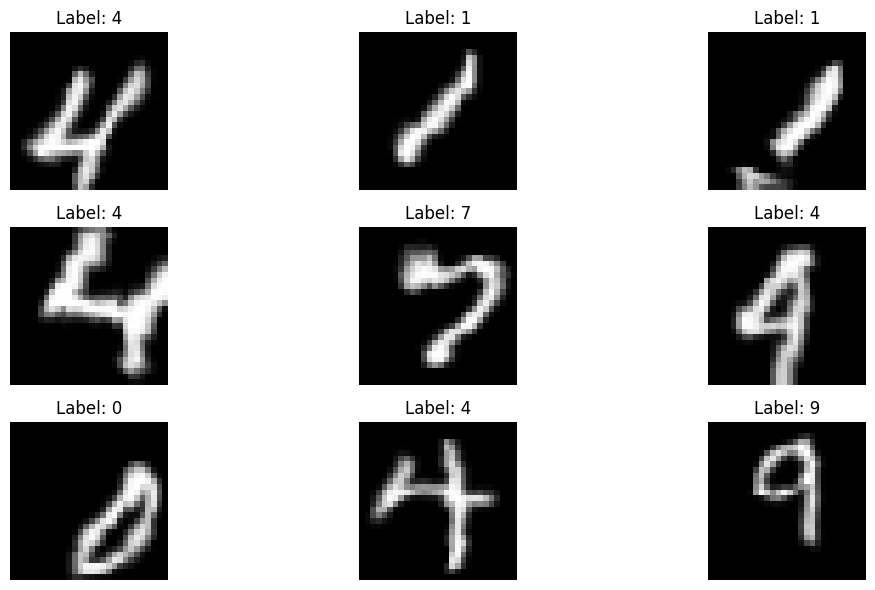

In [ ]:
# Get 9 random indices
indices = random.sample(range(len(augmented_train_dataset)), 9)

# Create a subplot
fig, axes = plt.subplots(3, 3, figsize=(12, 6))

# Display the images
for i, ax in enumerate(axes.flat):
    image, label = augmented_train_dataset[indices[i]]
    image = image.squeeze()  # Remove the channel dimension

    ax.imshow(image, cmap='gray')
    ax.set_title(f'Label: {label}')
    ax.axis('off')

plt.tight_layout()
plt.show()

$\textbf{Bumping up the size of train dataset by combining original and augmented train dataset}$

In [ ]:
from torch.utils.data import ConcatDataset

# Combine the original and augmented datasets
combined_train_dataset = ConcatDataset([original_train_dataset, augmented_train_dataset])
print('Length of Train dataset:', len(combined_train_dataset))
print('Length of Test dataset:', len(test_dataset))

Length of Train dataset: 120000
Length of Test dataset: 10000


$\textbf{Making Dataloaders}$

In [ ]:
# Create DataLoaders for training and testing
train_dataloader = torch.utils.data.DataLoader(combined_train_dataset, batch_size=64, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)
print('Number of batches in train dataloader:', len(train_dataloader))
print('Number of batches in test dataloader:', len(test_dataloader))

Number of batches in train dataloader: 1875
Number of batches in test dataloader: 157


# $\textbf{Homework}$

$\text{1) Load the 'Fashion MNIST' dataset by applying 'transforms.ToTensor()' transform while loading.}$
$\text{2) Check how many total images are there, size of trainset and testset, what is the shape of each image, how many total classes are there, print class names.}$
$\text{3) Visualize some images and their corresponding labels, Plot 10 images of each class.}$
$\text{4) Create train dataloader, test dataloader of any batch size. Print how many batches are formed in each, print shape of each batch (feature shape, labels shape).}$
$\text{5) Download the dataset in '.csv' format, upload it to google drive and load it again from the drive using 'gdown'. Make dataloaders out of it.}$
$\text{6) Perform some transformations like ElasticTransform, RandomAffine, Resize and visualize them.}$
$\text{7) Convert any random image into binary image, also try inverting the image.}$
$\text{8) Perform Data Augmentation and bump up the train dataset to double of its size and again create train and test dataloaders.}$